<a href="https://colab.research.google.com/github/Reneress/Mineracao/blob/master/08_KmeansExemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt

In [2]:
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids
    centroids = x[idx, :] #Step 1

    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2

    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3

    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids) #Updated Centroids

        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points

In [3]:
def show_digitsdataset(digits):
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
        # label the image with the target value
        ax.text(0, 7, str(digits.target[i]))

    #fig.show()

In [4]:
def plot_samples(projected, labels, title):
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)


In [8]:
import pandas as pd

home_data = pd.read_csv('dataAlter.csv')
home_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,-1
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,-1
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


[0.14890594 0.13618771]
(1797, 64)
(1797, 2)


<ipython-input-4-6c3c8c040930>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
<ipython-input-4-6c3c8c040930>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


101686.25132059933
For n_clusters = 10, silhouette score is 0.4063720731986407)


<ipython-input-4-6c3c8c040930>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
<ipython-input-4-6c3c8c040930>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,


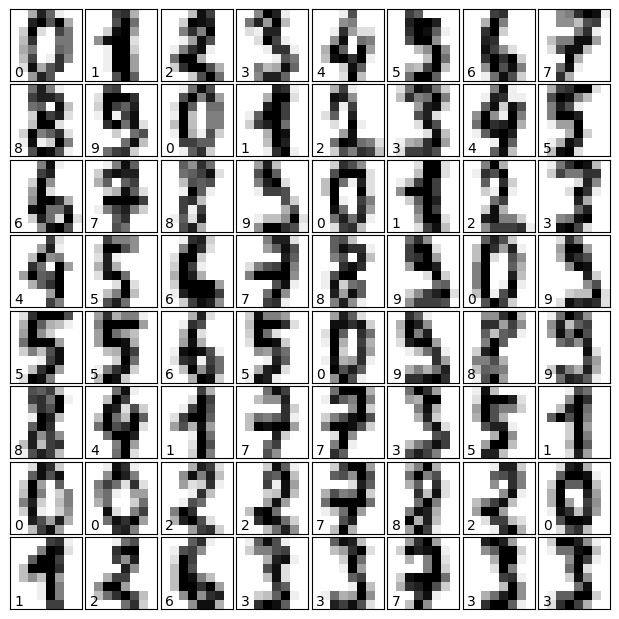

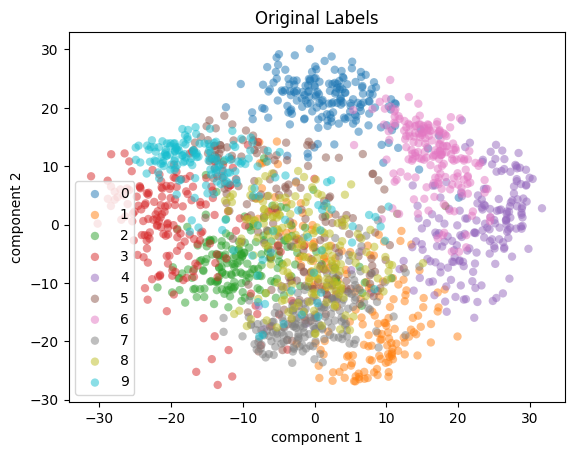

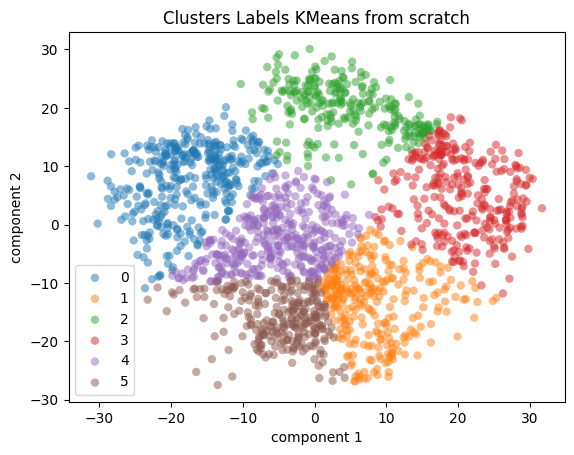

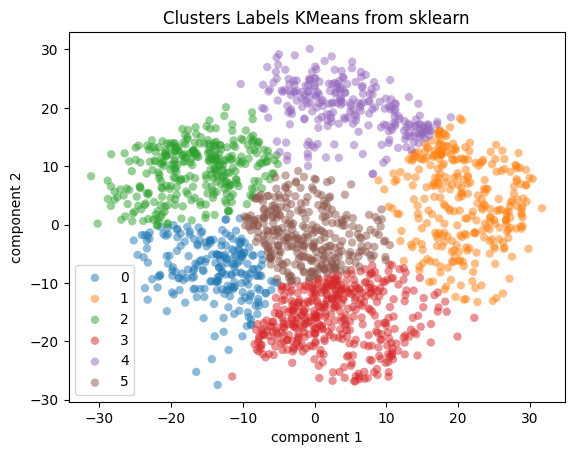

In [10]:
digits = load_digits()
show_digitsdataset(digits)

#Transform the data using PCA
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(pca.explained_variance_ratio_)
print(digits.data.shape)
print(projected.shape)
plot_samples(projected, digits.target, 'Original Labels')

#Applying our kmeans function from scratch
labels = KMeans_scratch(projected,6,5)

#Visualize the results
plot_samples(projected, labels, 'Clusters Labels KMeans from scratch')

#Applying sklearn kemans function
kmeans = KMeans(n_clusters=6).fit(projected)
print(kmeans.inertia_)
centers = kmeans.cluster_centers_
score = silhouette_score(projected, kmeans.labels_)
print("For n_clusters = {}, silhouette score is {})".format(10, score))

#Visualize the results sklearn
plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from sklearn')

plt.show()